## AMATH 422 HW 6

### I Coupled oscillators.

In [1]:
# imports
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la
import scipy.integrate as int

Choose a parameter set which produces clear oscillations for the uncoupled system ($\gamma = 0$). 

Address the question: do nonzero values of $\gamma$ serve to synchronize the two oscillators, in that when you start each oscillator with different initial conditions, the trajectories eventually converge over time? 

Illustrate this with appropriate plots. Does it matter whether $\gamma$ is positive or negative? Give some intuition for the effects of $\gamma$ in two written sentences.

### Defining the ODE.  


In [2]:
#repressilator ode
def repressilator_odefun(t, x0, alpha,alpha0, beta, gamma, n):
    m1, m2, m3 = x0[0], x0[1], x0[2]
    p1, p2, p3 = x0[3], x0[4], x0[5]
    n1, n2, n3 = x0[6], x0[7], x0[8]
    q1, q2, q3 = x0[9], x0[10], x0[11]

    dm1dt=-m1 + alpha/(1+p3**n)+ alpha0  #m_i,p_j
    dm2dt=-m2 + alpha/(1+p1**n)+ alpha0
    dm3dt=-m3 + alpha/(1+p2**n)+ alpha0

    dp1dt=-beta*(p1-m1) + gamma*(q1-p1) #p_i,m_i,q_i,p_i
    dp2dt=-beta*(p2-m2) + gamma*(q2-p2)
    dp3dt=-beta*(p3-m3) + gamma*(q3-p3)

    dn1dt=-n1 + alpha/(1+q3**n) + alpha0 #n_i, q_j
    dn2dt=-n2 + alpha/(1+q1**n) + alpha0
    dn3dt=-n3 + alpha/(1+q2**n) + alpha0

    dq1dt = -beta*(q1-n1) + gamma*(p1-q1) #q_i,n_i,p_i,q_i
    dq2dt = -beta*(q2-n2) + gamma*(p2-q2)
    dq3dt = -beta*(q3-n3) + gamma*(p3-q3)

    return np.array([dm1dt,dm2dt,dm3dt, dp1dt,dp2dt,dp3dt, dn1dt,dn2dt,dn3dt, dq1dt,dq2dt,dq3dt])

Choose a parameter set which produces clear oscillations for the uncoupled system gamma = 0

[1 2 3 1 2 3 1 2 3 1 2 3]


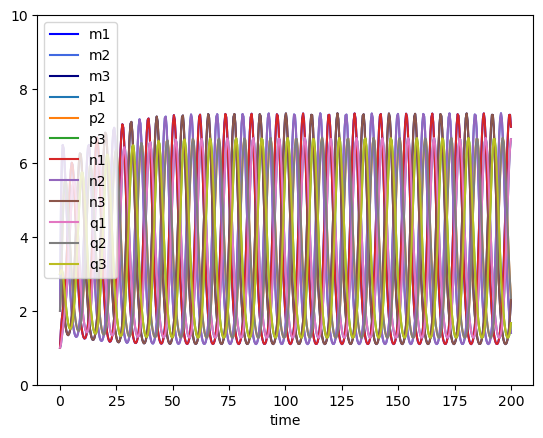

In [ ]:
# time parameters
tstart=0
tend=100
trange=np.array([tstart,tend])
count=500
teval=np.linspace(tstart,tend,count)

#Define paramaters
#Choose a parameter set which produces clear oscillations for the uncoupled system gamma = 0
alpha=20
alpha0=0.5
beta=1
n=2
gamma=0

#Define initial condition, at random 
rng = np.random.default_rng()
x0=rng.uniform(0,4,12)
x0 = np.array([1,2,3,1,2,3,1,2,3,1,2,3])
#print(x0)
print(x0)

#solve_ivp
sol=int.solve_ivp(repressilator_odefun, trange, x0, t_eval=teval,args=(alpha,alpha0,beta, gamma, n))
plt.figure()
plt.plot(sol.t,sol.y[0,:],label='m1',color='blue')
plt.plot(sol.t,sol.y[1,:],label='m2',color='royalblue')
plt.plot(sol.t,sol.y[2,:],label='m3',color='navy')
plt.plot(sol.t,sol.y[3,:],label='p1')
plt.plot(sol.t,sol.y[4,:],label='p2')
plt.plot(sol.t,sol.y[5,:],label='p3')
plt.plot(sol.t,sol.y[6,:],label='n1')
plt.plot(sol.t,sol.y[7,:],label='n2')
plt.plot(sol.t,sol.y[8,:],label='n3')
plt.plot(sol.t,sol.y[9,:],label='q1')
plt.plot(sol.t,sol.y[10,:],label='q2')
plt.plot(sol.t,sol.y[11,:],label='q3')

plt.xlabel('time')
plt.ylim(0,10)
plt.legend()

#use to zoom in if needed
#plt.xlim(80,100)
#plt.ylim(0,3)

Text(0.5, 0, 'q3')

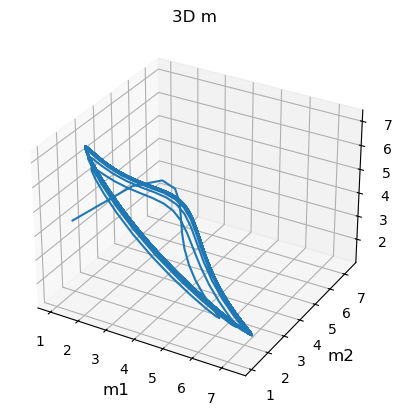

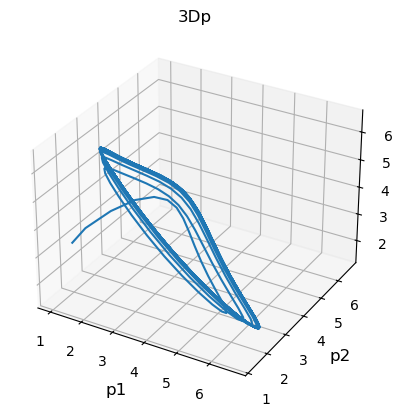

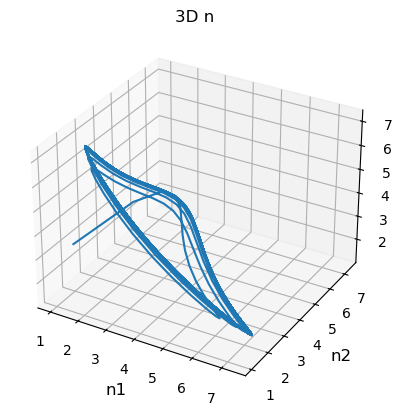

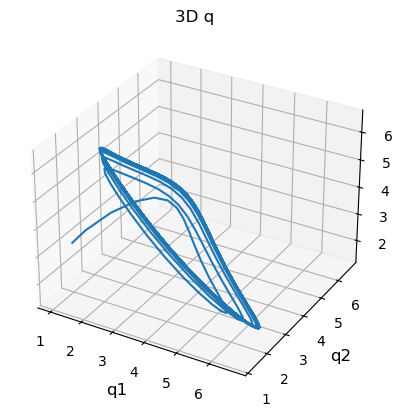

In [21]:
#3D GRPAH
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[0,:],sol.y[1,:],sol.y[2,:])
ax.set_title('3D m')
ax.set_xlabel('m1', fontsize=12)
ax.set_ylabel('m2', fontsize=12)
ax.set_zlabel('m3', fontsize=12)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[3,:],sol.y[4,:],sol.y[5,:])
ax.set_title('3Dp')
ax.set_xlabel('p1', fontsize=12)
ax.set_ylabel('p2', fontsize=12)
ax.set_zlabel('p3', fontsize=12)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[6,:],sol.y[7,:],sol.y[8,:])
ax.set_title('3D n')
ax.set_xlabel('n1', fontsize=12)
ax.set_ylabel('n2', fontsize=12)
ax.set_zlabel('n3', fontsize=12)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[9,:],sol.y[10,:],sol.y[11,:])
ax.set_title('3D q')
ax.set_xlabel('q1', fontsize=12)
ax.set_ylabel('q2', fontsize=12)
ax.set_zlabel('q3', fontsize=12)

A parameter value that produces clear oscillations when gamma is zero is shown in the graph above.


In [ ]:
# when $p_1,q_1,n_1,m_1 = 1$, $p_2, q_2,n_2,m_2 = 2$, and $p_3, q_3,n_3,m_3 = 3$

Address the question: do nonzero values of $\gamma$ serve to synchronize the two oscillators, in that when you start each oscillator with different initial conditions, the trajectories eventually converge over time? 

Illustrate this with appropriate plots. Does it matter whether $\gamma$ is positive or negative? Give some intuition for the effects of $\gamma$ in two written sentences.

<Figure size 640x480 with 0 Axes>

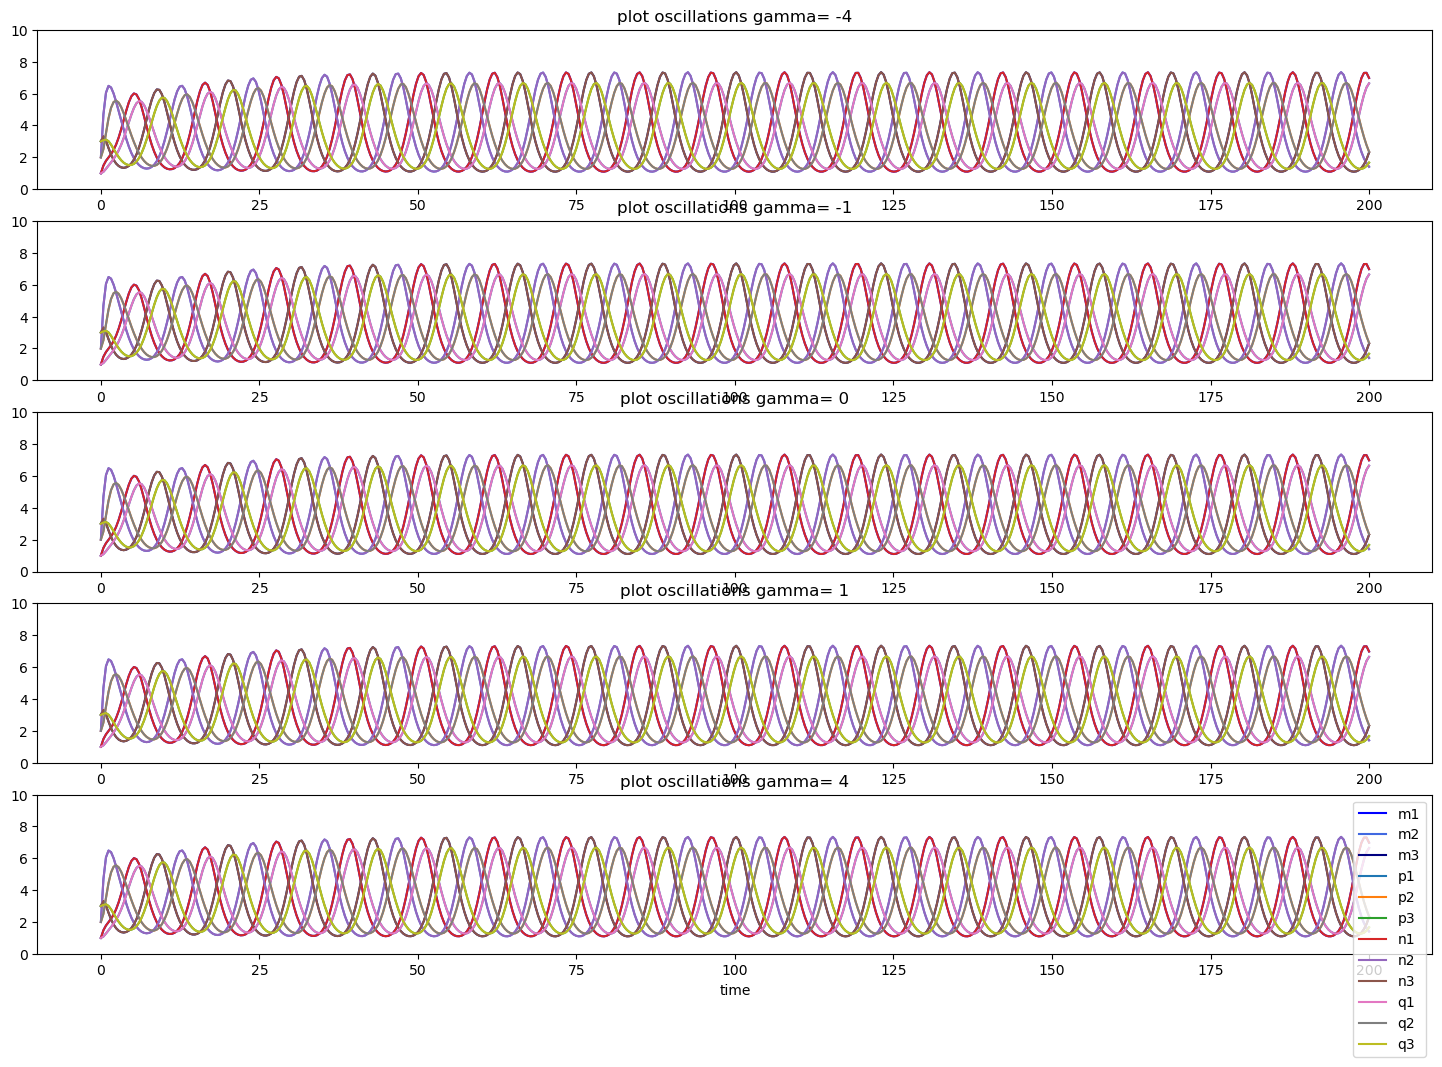

In [ ]:
# time parameters
tstart=0
tend=200
trange=np.array([tstart,tend])
count=500
teval=np.linspace(tstart,tend,count)

#Define paramaters
alpha=20
alpha0=0.5
beta=1
n=2

#Define initial condition, at random 
gamma_values = np.array([-4,-1,0,1,4])
#when x0 is 
x0 = np.array([1,2,3,1,2,3,1,2,3,1,2,3])  #m_3 = 3

i=1
plt.figure()
plt.figure(figsize=(18, 12))

#solve_ivp
for gamma in gamma_values:
    sol=int.solve_ivp(repressilator_odefun, trange, x0, t_eval=teval,args=(alpha,alpha0,beta, gamma, n))
    #plt.figure()
    plt.subplot(5,1,i)
    plt.plot(sol.t,sol.y[0,:],label='m1',color='blue')
    plt.plot(sol.t,sol.y[1,:],label='m2',color='royalblue')
    plt.plot(sol.t,sol.y[2,:],label='m3',color='navy')
    plt.plot(sol.t,sol.y[3,:],label='p1')
    plt.plot(sol.t,sol.y[4,:],label='p2')
    plt.plot(sol.t,sol.y[5,:],label='p3')
    plt.plot(sol.t,sol.y[6,:],label='n1')
    plt.plot(sol.t,sol.y[7,:],label='n2')
    plt.plot(sol.t,sol.y[8,:],label='n3')
    plt.plot(sol.t,sol.y[9,:],label='q1')
    plt.plot(sol.t,sol.y[10,:],label='q2')
    plt.plot(sol.t,sol.y[11,:],label='q3')

    plt.title(f"plot oscillations gamma= {gamma}")
    plt.ylim(0,10)
    i += 1

# does not need to be repeated
plt.xlabel('time')
plt.legend()

#use to zoom in if needed
#plt.xlim(80,100)
#plt.ylim(0,3)

#### Visualize in (a 3-D projection of) state space

Text(0.5, 0, 'q3')

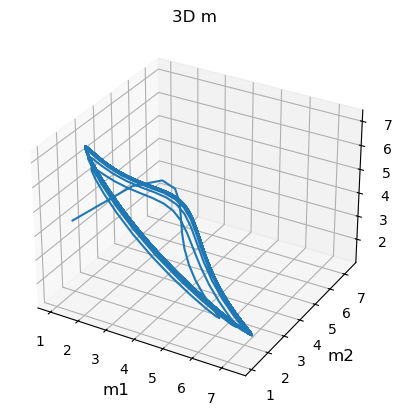

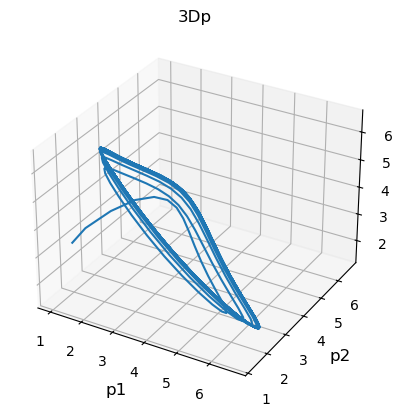

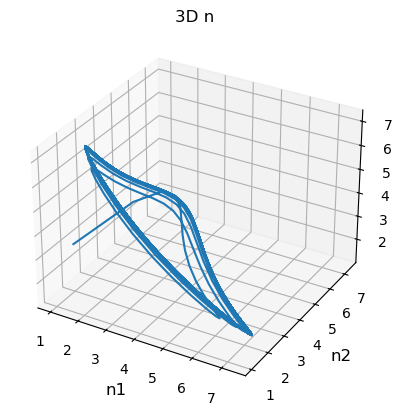

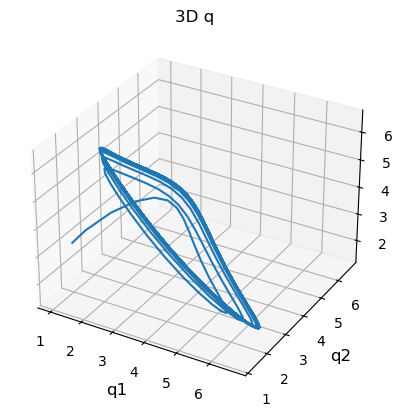

In [ ]:
#3D GRPAH
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[0,:],sol.y[1,:],sol.y[2,:])
ax.set_title('3D m')
ax.set_xlabel('m1', fontsize=12)
ax.set_ylabel('m2', fontsize=12)
ax.set_zlabel('m3', fontsize=12)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[3,:],sol.y[4,:],sol.y[5,:])
ax.set_title('3Dp')
ax.set_xlabel('p1', fontsize=12)
ax.set_ylabel('p2', fontsize=12)
ax.set_zlabel('p3', fontsize=12)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[6,:],sol.y[7,:],sol.y[8,:])
ax.set_title('3D n')
ax.set_xlabel('n1', fontsize=12)
ax.set_ylabel('n2', fontsize=12)
ax.set_zlabel('n3', fontsize=12)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[9,:],sol.y[10,:],sol.y[11,:])
ax.set_title('3D q')
ax.set_xlabel('q1', fontsize=12)
ax.set_ylabel('q2', fontsize=12)
ax.set_zlabel('q3', fontsize=12)

Illustrate this with appropriate plots. Does it matter whether $\gamma$ is positive or negative? Give some intuition for the effects of $\gamma$ in two written sentences.

In [ ]:
#For certain initial conditions it does matter whether gamma is positive or negative. 

# In this case  when the intial conditions are $p_1,q_1,n_1,m_1 = 1$, $p_2, q_2,n_2,m_2 = 2$, and $p_3, q_3,n_3,m_3 = 3$ 
# In this case the gamma values does not change oscilalation. 

C:\Users\julie\AppData\Local\Temp\ipykernel_25612\1296711984.py:8: RuntimeWarning: overflow encountered in scalar power
  dm1dt=-m1 + alpha/(1+p3**n)+ alpha0  #m_i,p_j
C:\Users\julie\AppData\Local\Temp\ipykernel_25612\1296711984.py:16: RuntimeWarning: overflow encountered in scalar power
  dn1dt=-n1 + alpha/(1+q3**n) + alpha0 #n_i, q_j
C:\Users\julie\AppData\Local\Temp\ipykernel_25612\1296711984.py:9: RuntimeWarning: overflow encountered in scalar power
  dm2dt=-m2 + alpha/(1+p1**n)+ alpha0
C:\Users\julie\AppData\Local\Temp\ipykernel_25612\1296711984.py:17: RuntimeWarning: overflow encountered in scalar power
  dn2dt=-n2 + alpha/(1+q1**n) + alpha0
C:\Users\julie\AppData\Local\Temp\ipykernel_25612\1296711984.py:10: RuntimeWarning: overflow encountered in scalar power
  dm3dt=-m3 + alpha/(1+p2**n)+ alpha0
C:\Users\julie\AppData\Local\Temp\ipykernel_25612\1296711984.py:18: RuntimeWarning: overflow encountered in scalar power
  dn3dt=-n3 + alpha/(1+q2**n) + alpha0
C:\Users\julie\AppData\Lo

<Figure size 640x480 with 0 Axes>

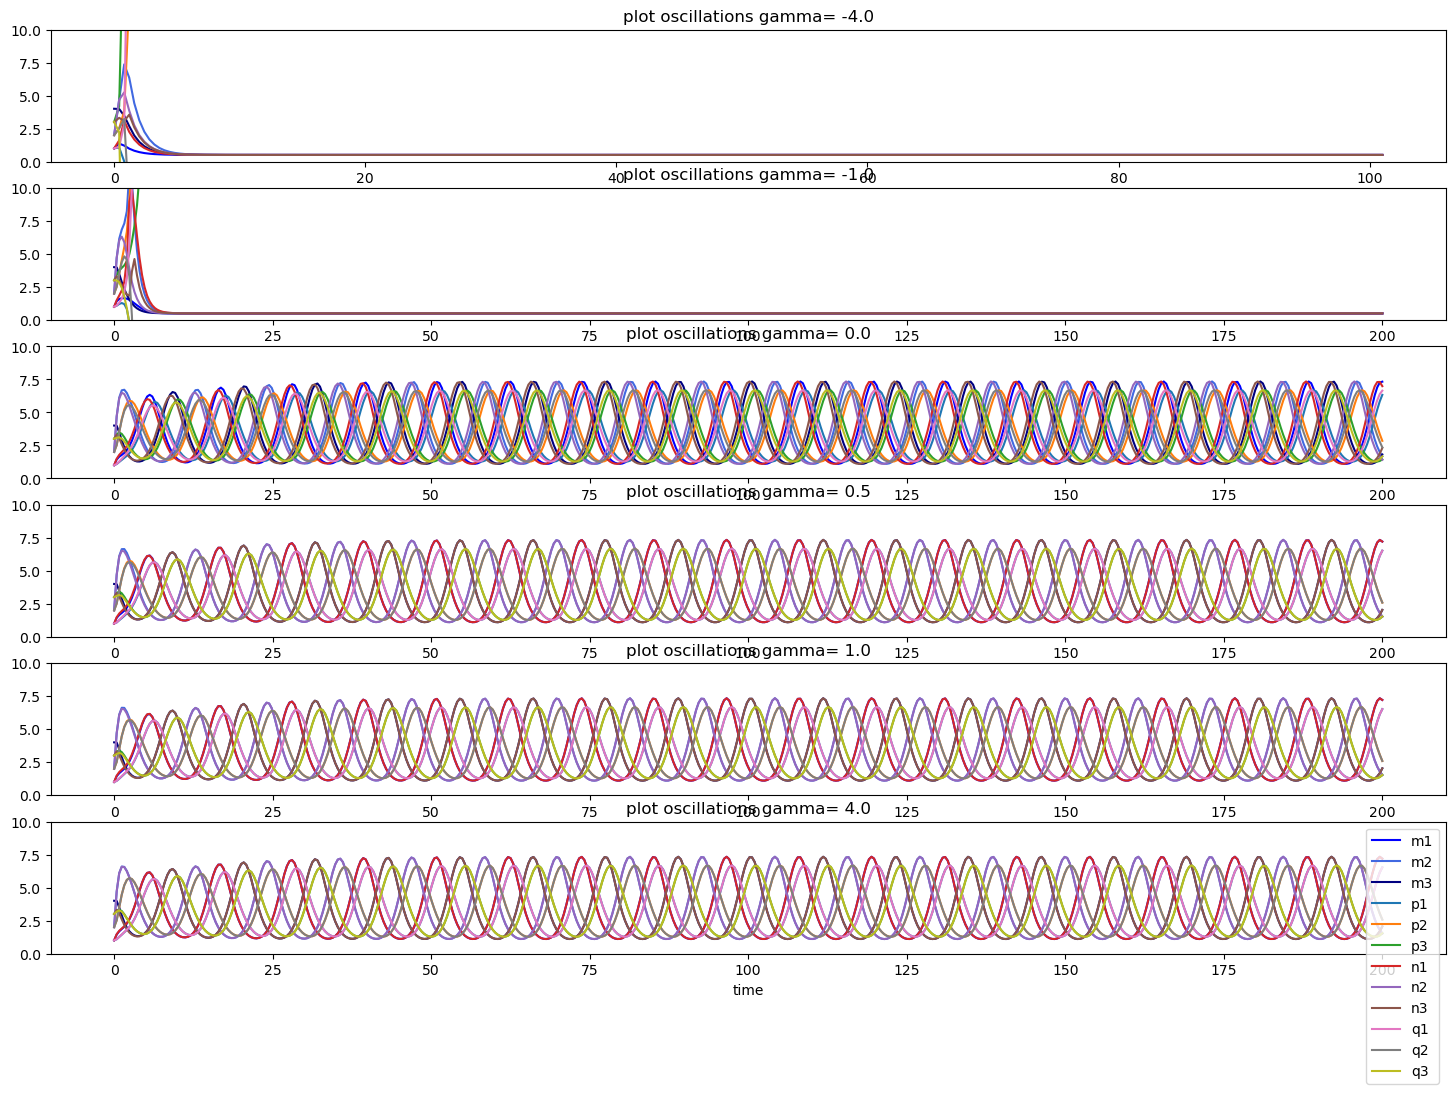

In [20]:
#Define paramaters
alpha=20
alpha0=0.5
beta=1
n=2

#Define initial condition, at random 
gamma_values = np.array([-4,-1,0,0.5,1,4])
#when x0 is 
x0 = np.array([1,2,4,1,2,3,1,2,3,1,2,3]) #m_3 =4

i=1
plt.figure()
plt.figure(figsize=(18, 12))


#solve_ivp
for gamma in gamma_values:
    sol=int.solve_ivp(repressilator_odefun, trange, x0, t_eval=teval,args=(alpha,alpha0,beta, gamma, n))
    #plt.figure()
    plt.subplot(6,1,i)
    plt.plot(sol.t,sol.y[0,:],label='m1',color='blue')
    plt.plot(sol.t,sol.y[1,:],label='m2',color='royalblue')
    plt.plot(sol.t,sol.y[2,:],label='m3',color='navy')
    plt.plot(sol.t,sol.y[3,:],label='p1')
    plt.plot(sol.t,sol.y[4,:],label='p2')
    plt.plot(sol.t,sol.y[5,:],label='p3')
    plt.plot(sol.t,sol.y[6,:],label='n1')
    plt.plot(sol.t,sol.y[7,:],label='n2')
    plt.plot(sol.t,sol.y[8,:],label='n3')
    plt.plot(sol.t,sol.y[9,:],label='q1')
    plt.plot(sol.t,sol.y[10,:],label='q2')
    plt.plot(sol.t,sol.y[11,:],label='q3')

    plt.title(f"plot oscillations gamma= {gamma}")
    plt.ylim(0,10)
    i += 1

# does not need to be repeated
plt.xlabel('time')
plt.legend()

#use to zoom in if needed
#plt.xlim(80,100)
#plt.ylim(0,3)

Text(0.5, 0, 'q3')

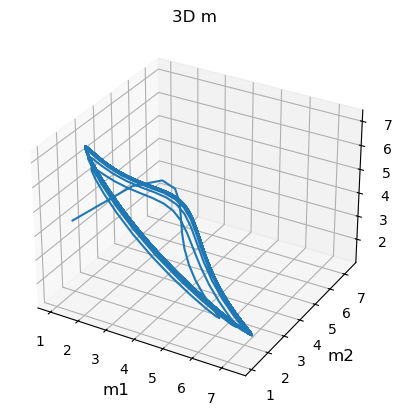

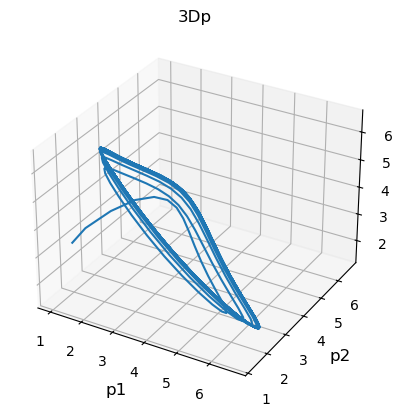

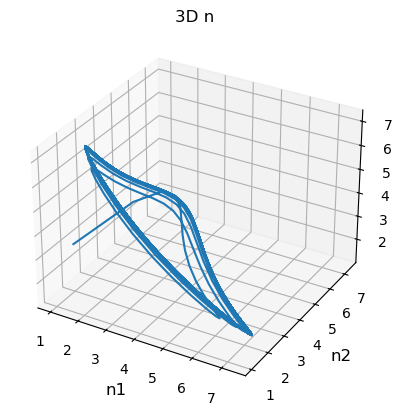

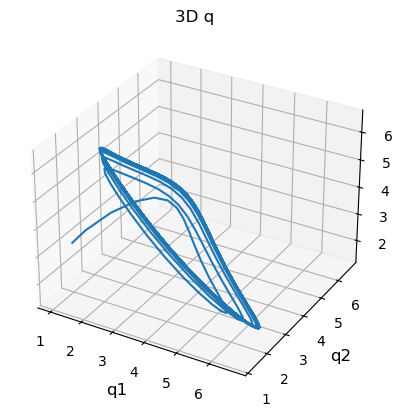

In [19]:
#3D GRPAH
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[0,:],sol.y[1,:],sol.y[2,:])
ax.set_title('3D m')
ax.set_xlabel('m1', fontsize=12)
ax.set_ylabel('m2', fontsize=12)
ax.set_zlabel('m3', fontsize=12)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[3,:],sol.y[4,:],sol.y[5,:])
ax.set_title('3Dp')
ax.set_xlabel('p1', fontsize=12)
ax.set_ylabel('p2', fontsize=12)
ax.set_zlabel('p3', fontsize=12)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[6,:],sol.y[7,:],sol.y[8,:])
ax.set_title('3D n')
ax.set_xlabel('n1', fontsize=12)
ax.set_ylabel('n2', fontsize=12)
ax.set_zlabel('n3', fontsize=12)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(sol.y[9,:],sol.y[10,:],sol.y[11,:])
ax.set_title('3D q')
ax.set_xlabel('q1', fontsize=12)
ax.set_ylabel('q2', fontsize=12)
ax.set_zlabel('q3', fontsize=12)

In [ ]:
#However when the inital conditions are $p_1,q_1,n_1,m_1 = 1$, $p_2, q_2,n_2,m_2 = 2$, and $p_3, q_3,n_3 = 3$ $m_3 = 4$

#When $\gamma$ is positive the graphs continues to oscillate. The different values continue to oscillate and converge on a specific point.

#When $\gamma$ is negative it acts as a dampening factor as both systems the previously coupled and uncoupled system damped to a specified value.

#values of gamma between 0 and 1 make the oscillations sync up better.

#For certain inital conditions gamma does not change the oscillation plots.

#This makes sense as gamma is the dampenning factor and if the system is in the correct equilibrium the dampening factor will be distributed
#Equally and not cause the system to converge on a single point. I am not sure behind the physics of why this is.

#The 


### II Systems biology and network motifs. 

Read the Nature Review Genetics paper by Alon, 2007, on
the website. 

Write down a set of differential equations that can model the phenomenon discussed in
Fig. 7a and 7b only, and simulate them in code to produce qualitatively similar figures (i.e., solutions
that have roughly the same shape vs time for the full time axis).

READ THIS: Take a look at the 2002 paper from Shen-Orr et al, also on the website, which has a methods section proposing specific
equations that describe the results in that Fig. 2. Your equations should have this same general form
(i.e., use a modified form of these equations), involving nonlinear interactions between chemical species
and, besides the Z forcing term, no explicit time-dependence (i.e., do not just code in the answer).

##### Differential Equations written down:

$\frac{dX_i}{dt} = F(Z, T_x) - a * X_i$

$\frac{dY_i}{dt} = F(Z, T_y) - a * Y_i$

$Y_i$ and $X_i$ are the protein concentrations. $T_y$ and $T_x$ are the threshold values.  $a$ is the protein decay rate. $Z$ is the input value. $F(Z, T)$ is a boolean equation where when $Z>=T$ it returns $1$ and when $Z<T$ it returns $0$.

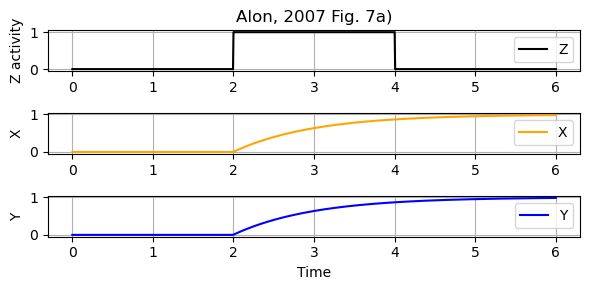

In [9]:
## ALON 2007 figure 7a)

# Define the Boolean kinetics function
def Fy(Z, T):
    if Y[-1] > Ty:
        return 1 # 'memory' once threshold is hit
    else:
        #return Z / (T + Z) #sigmoid code.
        return np.where(Z >= T, 1, 0) 
    
def Fx(Z, T):
    if X[-1] > Tx:
        return 1 # 'memory' once threshold is hit
    else:
        #return Z / (T + Z) #sigmoid code.
        return np.where(Z >= T, 1, 0) 

# Parameters
Tx, Ty = 0.5, 0.5 # Thresholds
a = 1           # Decay rate
count = 1000
time = np.linspace(0, 6, count)  # Time array
dt = time[1] - time[0]          # Time step

# Define input Z
Z = np.array([1 if (2 <= t <= 4) else 0 for t in time])

# Initial Concentration of protein
X, Y = [0], [0]

# Simulate feedforward loop dynamics
for i, t in enumerate(time[1:], 1):
    dX = X[-1] + (Fx(Z[i], Tx) - a*X[-1])*dt
    dY = Y[-1] + (Fy(Z[i], Ty) - a*Y[-1])*dt
    X.append(dX)
    Y.append(dY)

# Convert to numpy arrays for plotting
Xplot7a, Yplot7a = np.array(X), np.array(Y)

# Plotting
plt.figure(figsize=(6, 3))

plt.subplot(3, 1, 1)
plt.plot(time, Z, label="Z", color='black')
#plt.plot(time, Xplot7a, label="X")
plt.title("Alon, 2007 Fig. 7a)")
#plt.xlabel("Time")
plt.ylabel("Z activity")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
#plt.plot(time, Z, label="Z", linestyle='--', color='black')
plt.plot(time, Xplot7a, label="X", color='orange')
#plt.title("Concentration of protein X")
#plt.xlabel("Time")
plt.ylabel("X")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
#plt.plot(time, Z, label="Z", linestyle='--', color='black')
plt.plot(time, Yplot7a, label="Y", color='blue')
#plt.title("Concentration of protein Y")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

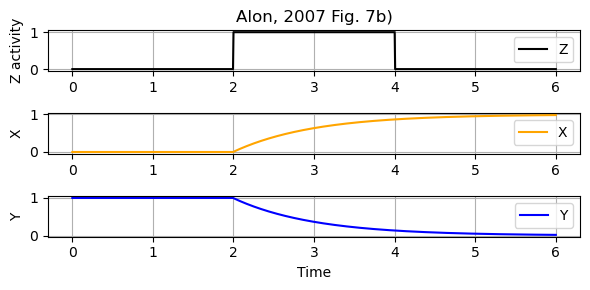

In [10]:
## ALON 2007 figure 7b)

# Define the Boolean kinetics function
def Fy(Z, Ty):
    if Y[-1] < Ty:
        return 0 # 'memory' once threshold is hit
    else:
        #return Z / (T + Z) #sigmoid code.
        return np.where(Z >= Ty, 0, 1) 
    
def Fx(Z, Tx):
    if X[-1] > Tx:
        return 1 # 'memory' once threshold is hit
    else:
        #return Z / (T + Z) #sigmoid code.
        return np.where(Z >= Tx, 1, 0) 

# Parameters
Tx, Ty = 0.5, 0.5 # Thresholds
a = 1           # Decay rate
count = 1000
time = np.linspace(0, 6, count)  # Time array
dt = time[1] - time[0]          # Time step
X, Y = [0], [1] # Initial Concentration of protein

# Define input Z
Z = np.array([1 if (2 <= t <= 4) else 0 for t in time])

# Simulate feedforward loop dynamics
for i, t in enumerate(time[1:], 1):
    dX = X[-1] + (Fx(Z[i], Tx) - a*X[-1])*dt
    dY = Y[-1] + (Fy(Z[i], Ty) - a*Y[-1])*dt
    X.append(dX)
    Y.append(dY)

# Convert to numpy arrays for plotting
Xplot7b, Yplot7b = np.array(X), np.array(Y)

# Plotting
plt.figure(figsize=(6, 3))

plt.subplot(3, 1, 1)
plt.plot(time, Z, label="Z", color='black')
#plt.plot(time, Xplot7a, label="X")
plt.title("Alon, 2007 Fig. 7b)")
#plt.xlabel("Time")
plt.ylabel("Z activity")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
#plt.plot(time, Z, label="Z", linestyle='--', color='black')
plt.plot(time, Xplot7b, label="X", color='orange')
#plt.title("Concentration of protein X")
#plt.xlabel("Time")
plt.ylabel("X")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
#plt.plot(time, Z, label="Z", linestyle='--', color='black')
plt.plot(time, Yplot7b, label="Y", color='blue')
#plt.title("Concentration of protein Y")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Write two sentences, for each of 7a and 7b, explaining the form of your differential
equations, and why these match the "motif" schematic in the figure.

In [ ]:
# The form of my differential equations match the motif in the figure because they do the following things correctly:
# for both graphs 7a and 7b
# They respond to an input Z at the appropiate time time=2.
# They grow gradually in the same to the appropiate protein concentration value of 1 or 0
# They have memory so even after the input Z is removed the protein concentrations continue to rise or fall accordingly.
# The graphs are defined on the correct bounds.
# The plots utilize  nonlinear interactions between chemical species equations, a Z forcing term, and no time dependence in the equation.